In [242]:
#Importacion de las funciones 
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from itertools import zip_longest
import pdfkit
from itertools import zip_longest
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score  
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn import metrics
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from sklearn.metrics import accuracy_score
import sklearn.neighbors as neighbors
import sklearn.naive_bayes as nb
import sklearn.svm as svm
import sklearn.ensemble as ensemble
import xgboost
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

<div style="font-size: 45px; font-weight: bold;">1: Consumo de combustible</div>

# Preparacion de los datos 

**Exportacion de los datos desde archivo excel**

In [243]:
ruta_archivo_excel = "C:/Users/felip/OneDrive/Documentos/Python/Codigos/Trabajo_minera/Combustible/Combustible.xlsx"
df = pd.read_excel(ruta_archivo_excel)
Produccion_1 = "diesel"
df_produccion1 = pd.read_excel(ruta_archivo_excel, sheet_name=Produccion_1)
print(df_produccion1)

            time      Hora  SCU_HSCU_FIT01 Unidad
0     2021-06-01  00:59:00            2.63  l/min
1     2021-06-01  01:59:00            2.52  l/min
2     2021-06-01  02:59:00            2.37  l/min
3     2021-06-01  03:59:00            2.37  l/min
4     2021-06-01  04:59:00            2.37  l/min
...          ...       ...             ...    ...
13169 2022-12-01  18:59:00            0.03  l/min
13170 2022-12-01  19:59:00            0.03  l/min
13171 2022-12-01  20:59:00            0.89  l/min
13172 2022-12-01  21:59:00            2.74  l/min
13173 2022-12-01  22:59:00            2.71  l/min

[13174 rows x 4 columns]


# Examinando los datos perdidos

**Naturaleza de los datos**

In [244]:
#Analisar los tipos de datos que tengo en el data_frame
tipos_de_datos = df_produccion1.dtypes
print(tipos_de_datos)

time              datetime64[ns]
Hora                      object
SCU_HSCU_FIT01           float64
Unidad                    object
dtype: object


**Datos perdidos**

*Vamos a exmaniar la cantidad de daatos peridos a modo de evaluar la base de datos*

In [245]:
df_produccion1.isnull().mean() * 100

time              0.0
Hora              0.0
SCU_HSCU_FIT01    0.0
Unidad            0.0
dtype: float64

<Axes: >

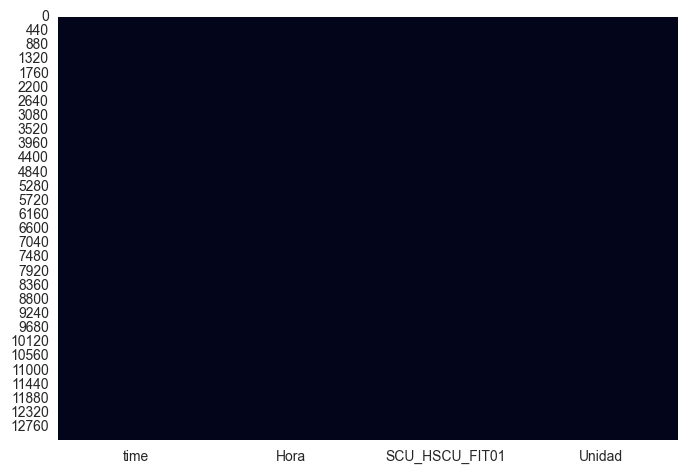

In [246]:
import seaborn as sns
sns.heatmap(df_produccion1.isnull(), cbar=False)

# Analisis exploratorio 

In [247]:
from tabulate import tabulate
#Hacer el analisis estadistico para todas las columnas con valores numericos
#variable=nombre_dataframe.describe().iloc(:,tamanho de las columnas)
Analisis = df_produccion1.describe().iloc[:, :14]
#print(Analisis)
# Imprimir la tabla en formato Markdown
print(Analisis.to_markdown(stralign="center"))
#Analisis_quinta_columna = df.iloc[:, 4].describe()
#print(Analisis_quinta_columna)

|       |             time              |   SCU_HSCU_FIT01 |
|:-----:|:-----------------------------:|-----------------:|
| count |             13174             |      13174       |
| mean  | 2022-03-01 23:32:33.848489472 |          2.22237 |
|  min  |      2021-06-01 00:00:00      |         -5.03    |
|  25%  |      2021-10-16 00:00:00      |          0.03    |
|  50%  |      2022-03-02 00:00:00      |          3.07    |
|  75%  |      2022-07-17 00:00:00      |          3.79    |
|  max  |      2022-12-01 00:00:00      |         23.8     |
|  std  |              nan              |          2.37461 |


In [248]:
# Contar los valores negativos
conteo_negativos = (df_produccion1["SCU_HSCU_FIT01"] < 0).sum()
print("Número de valores negativos en el DataFrame:", conteo_negativos)
# Contar los espacios en blanco 
conteo_valores_nulos = df_produccion1["SCU_HSCU_FIT01"].isna().sum()
print("Número de valores nulos en el DataFrame:", conteo_valores_nulos)
# Calcula los valores absolutos de las columnas 
df_produccion1['SCU_HSCU_FIT01'] = df_produccion1['SCU_HSCU_FIT01'].abs()
#print(df_produccion1)

Número de valores negativos en el DataFrame: 665
Número de valores nulos en el DataFrame: 0


# Analisis de los casi "ceros"

**En total existen 546 valores indicados como "Strings", por lo cual hay que hacer algun tipo de limpieza**

In [249]:
# Supongamos que tu DataFrame se llama df y la columna de interés es 'columna_mixta'
columna_mixta = df_produccion1['SCU_HSCU_FIT01']
# Obtener el conteo de cada valor único, incluyendo strings y valores numéricos
conteo_valores = columna_mixta.value_counts()
# Obtener la cantidad de valores únicos, incluyendo strings y valores numéricos
total_valores_unicos = columna_mixta.nunique()
# Muestra el conteo de cada valor único
print(conteo_valores)
# Muestra la cantidad total de valores únicos
print(f'Total de valores únicos: {total_valores_unicos}')


SCU_HSCU_FIT01
0.01     1047
0.02      861
0.00      489
5.01      445
0.03      247
         ... 
12.30       1
12.02       1
12.78       1
7.25        1
11.65       1
Name: count, Length: 546, dtype: int64
Total de valores únicos: 546


**Hay casi 2400 datos que son casi cero, hay que evaluar remover ese valor e intercambiarlo por cero**

# Transformacion de la columna tiempo 

In [250]:
df_produccion1['time'] = pd.to_datetime(df_produccion1['time'])
df_produccion1['combustible_hora'] = df_produccion1['SCU_HSCU_FIT01'] * 60
print(df_produccion1)

            time      Hora  SCU_HSCU_FIT01 Unidad  combustible_hora
0     2021-06-01  00:59:00            2.63  l/min             157.8
1     2021-06-01  01:59:00            2.52  l/min             151.2
2     2021-06-01  02:59:00            2.37  l/min             142.2
3     2021-06-01  03:59:00            2.37  l/min             142.2
4     2021-06-01  04:59:00            2.37  l/min             142.2
...          ...       ...             ...    ...               ...
13169 2022-12-01  18:59:00            0.03  l/min               1.8
13170 2022-12-01  19:59:00            0.03  l/min               1.8
13171 2022-12-01  20:59:00            0.89  l/min              53.4
13172 2022-12-01  21:59:00            2.74  l/min             164.4
13173 2022-12-01  22:59:00            2.71  l/min             162.6

[13174 rows x 5 columns]


# Agrupacion por dia de los datos (Base de tiempo)

In [251]:
#Hacer la suma de los combustibles por dia 
resultados = df_produccion1.groupby(df_produccion1['time'].dt.date)['combustible_hora'].sum().reset_index()
print(resultados)
media_combustible_diario = resultados['combustible_hora'].mean()
print(media_combustible_diario)
#Analisar los tipos de datos que tengo en el data_frame
tipos_de_datos = df_produccion1.dtypes
print(tipos_de_datos)

           time  combustible_hora
0    2021-06-01            3267.6
1    2021-06-02            4309.8
2    2021-06-03            4324.2
3    2021-06-04            1038.6
4    2021-06-05            4413.0
..          ...               ...
544  2022-11-27            4475.4
545  2022-11-28            3097.8
546  2022-11-29            3049.2
547  2022-11-30            1936.8
548  2022-12-01            1524.6

[549 rows x 2 columns]
3915.4163934426233
time                datetime64[ns]
Hora                        object
SCU_HSCU_FIT01             float64
Unidad                      object
combustible_hora           float64
dtype: object


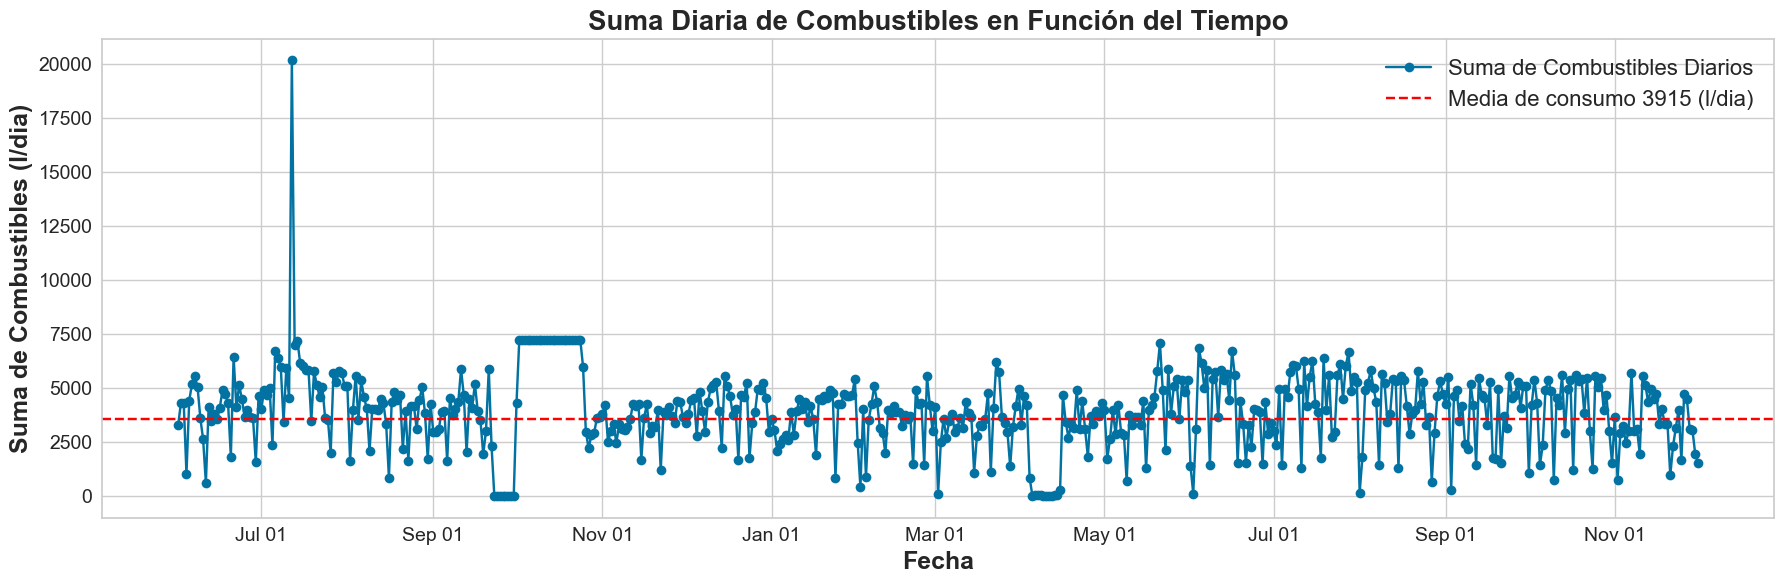

In [252]:
# Agrupa los datos por día y calcula la suma de combustibles para cada día
resultados = df_produccion1.groupby(df_produccion1['time'].dt.date)['combustible_hora'].sum().reset_index()
# Graficar la suma de combustibles diarios en función del tiempo
plt.figure(figsize=(18, 6))
plt.plot(resultados['time'], resultados['combustible_hora'], marker='o', linestyle='-', label='Suma de Combustibles Diarios')
plt.axhline(y=3558, color='red', linestyle='--', label='Media de consumo 3915 (l/dia)')
# Título y etiquetas de ejes
plt.title('Suma Diaria de Combustibles en Función del Tiempo', fontsize=20, fontweight='bold')
plt.xlabel('Fecha', fontsize=18, fontweight='bold')
plt.ylabel('Suma de Combustibles (l/dia)', fontsize=18, fontweight='bold')
plt.grid(True)
# Formato de fecha en el eje X para mostrar solo el mes y el día
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%b %d"))
# Ajusta el tamaño de fuente y la negrita de los datos en el eje X y Y
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Agrega la leyenda con títulos más grandes
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

<div style="font-size: 45px; font-weight: bold;">2: Produccion u Capacidad de secado</div>

# Preparacion de los datos 

**Importacion de los datos**

In [253]:
ruta_archivo_excel = "C:/Users/felip/OneDrive/Documentos/Python/Codigos/Trabajo_minera/datos_minera.xlsx"
df = pd.read_excel(ruta_archivo_excel)
#### Importar la info 
Produccion_2 = "produccion"
df_produccion = pd.read_excel(ruta_archivo_excel, sheet_name=Produccion_2)
print(df_produccion)

            time SCU_Z01_WIT01  produccion
0     2021-06-01      00:59:00       85.17
1     2021-06-01      01:59:00       94.90
2     2021-06-01      02:59:00      106.86
3     2021-06-01      03:59:00      117.27
4     2021-06-01      04:59:00      127.53
...          ...           ...         ...
13889 2022-12-31      18:59:00       41.65
13890 2022-12-31      19:59:00       41.60
13891 2022-12-31      20:59:00       40.54
13892 2022-12-31      21:59:00       30.51
13893 2022-12-31      22:59:00       12.46

[13894 rows x 3 columns]


**Naturaleza de los datos**

In [254]:
#Analisar los tipos de datos que tengo en el data_frame
tipos_de_datos = df_produccion.dtypes
print(tipos_de_datos)

time             datetime64[ns]
SCU_Z01_WIT01            object
produccion              float64
dtype: object


Devido a que "SCU_Z01_WIT01" es del tipo objeto, significa que contiene tanto variables numericas como "Strings"

**Datos ausentes**

*Como se puede apreciar, no se encontraron datos ausentes en esta base de datos*

<Axes: >

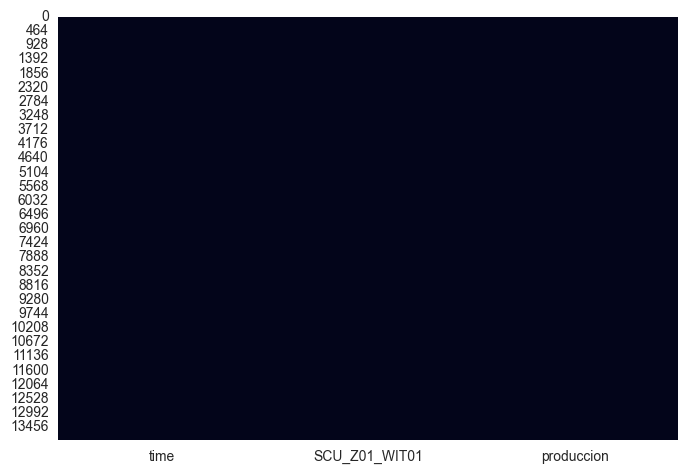

In [255]:
import seaborn as sns
df_produccion1.isnull().mean() * 100
sns.heatmap(df_produccion.isnull(), cbar=False)

In [256]:
import pandas as pd

# Supongamos que df_produccion es tu DataFrame

# Convertir la columna 'SCU_Z01_WIT01' a tipo numérico
df_produccion['SCU_Z01_WIT01'] = pd.to_numeric(df_produccion['SCU_Z01_WIT01'], errors='coerce')

# Contar los valores negativos
conteo_negativos = (df_produccion["SCU_Z01_WIT01"] < 0).sum()
print("Número de valores negativos en el DataFrame:", conteo_negativos)

# Contar los valores nulos (espacios en blanco)
conteo_valores_nulos = df_produccion["SCU_Z01_WIT01"].isna().sum()
print("Número de valores nulos en el DataFrame:", conteo_valores_nulos)

# Calcular los valores absolutos de las columnas
#df_produccion['SCU_Z01_WIT01'] = df_produccion['SCU_Z01_WIT01'].abs()

# Imprimir el DataFrame actualizado
#print(df_produccion)

Número de valores negativos en el DataFrame: 0
Número de valores nulos en el DataFrame: 13894


*Otros analisis a la base de datos*

In [257]:
#Conversion de la fecha a datatime
df_produccion['time'] = pd.to_datetime(df_produccion['time'])
#Agrupacion por dia 
resultados_1= df_produccion.groupby(df_produccion['time'].dt.date)['produccion'].sum().reset_index()
#Calculo de la media
media_produccion = resultados_1['produccion'].mean()
print(resultados_1)
print(media_produccion)

           time  produccion
0    2021-06-01     1844.65
1    2021-06-02     1554.51
2    2021-06-03      492.30
3    2021-06-04      217.44
4    2021-06-05      619.83
..          ...         ...
574  2022-12-27      682.75
575  2022-12-28      491.71
576  2022-12-29      676.96
577  2022-12-30      271.22
578  2022-12-31      239.97

[579 rows x 2 columns]
456.3692573402418


# Graficando el espacio de nuestra variable "Produccion u capacidad nominal"

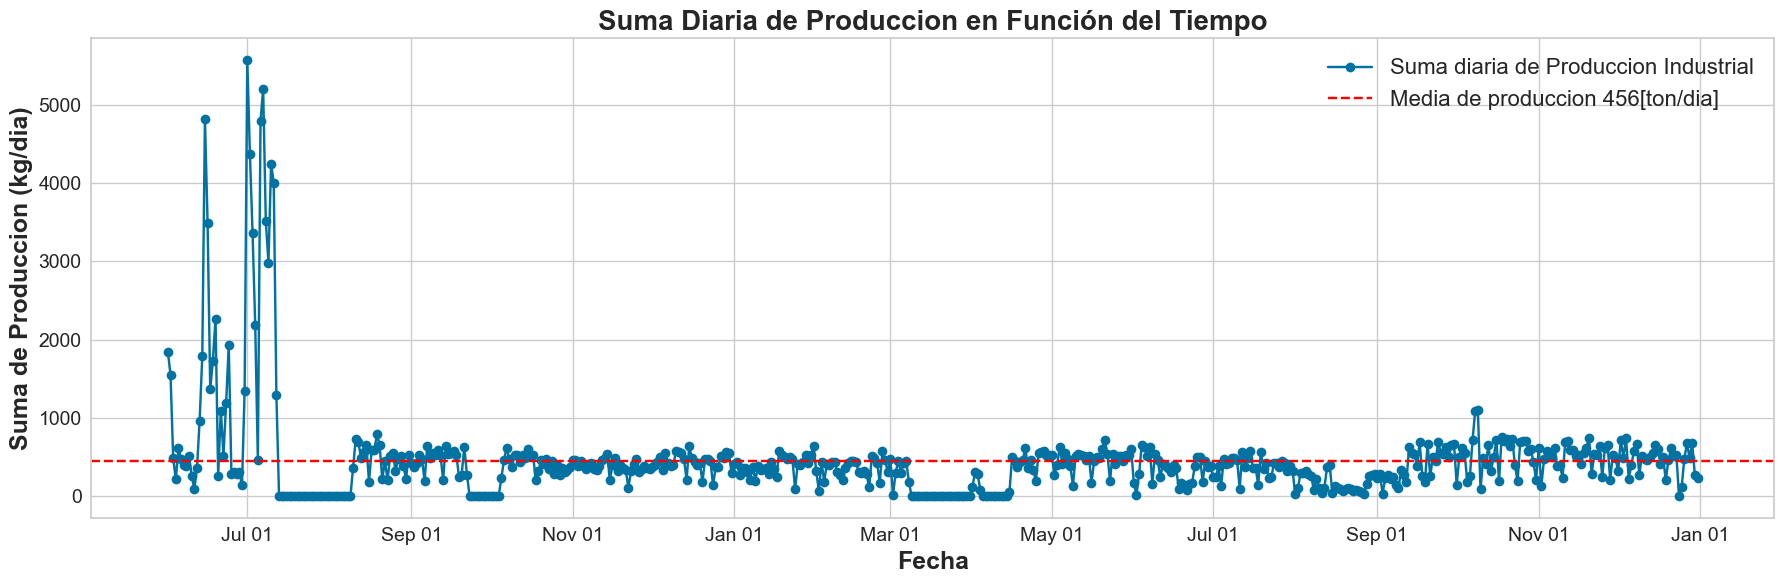

In [258]:

# Graficar la suma de combustibles diarios en función del tiempo
plt.figure(figsize=(18, 6))
plt.plot(resultados_1['time'], resultados_1['produccion'], marker='o', linestyle='-', label='Suma diaria de Produccion Industrial')
plt.axhline(y=456, color='red', linestyle='--', label='Media de produccion 456[ton/dia]')
# Título y etiquetas de ejes
plt.title('Suma Diaria de Produccion en Función del Tiempo', fontsize=20, fontweight='bold')
plt.xlabel('Fecha', fontsize=18, fontweight='bold')
plt.ylabel('Suma de Produccion (kg/dia)', fontsize=18, fontweight='bold')
plt.grid(True)
# Formato de fecha en el eje X para mostrar solo el mes y el día
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%b %d"))
# Ajusta el tamaño de fuente y la negrita de los datos en el eje X y Y
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Agrega la leyenda con títulos más grandes
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

<div style="font-size: 45px; font-weight: bold;">3: Analisis de las temperaturas</div>

**Importacion de los datos**

In [259]:
# Ruta completa del archivo CSV
ruta_archivo_csv = r'C:\Users\felip\OneDrive\Documentos\Python\Codigos\Trabajo_minera\felipe_dados.csv'
# Cargar datos desde el archivo CSV
df_temperaturas = pd.read_csv(ruta_archivo_csv)

*Naturaleza del tipo de datos*

In [260]:
#Analisar los tipos de datos que tengo en el data_frame
tipos_de_datos = df_temperaturas.dtypes
print(tipos_de_datos)

Data             object
Hora             object
SCU_HSCU_TE01    object
SCU_HSCU_TE02    object
SCU_HSCU_TE03    object
dtype: object


*Datos Ausentes*

<Axes: >

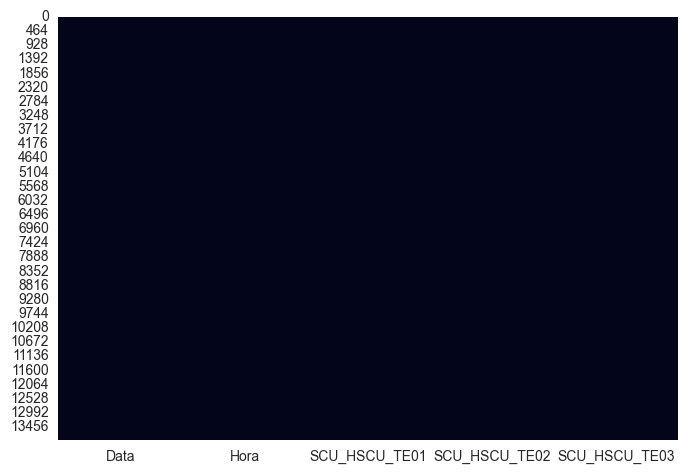

In [261]:
import seaborn as sns
sns.heatmap(df_temperaturas.isnull(), cbar=False)

In [262]:
# Eliminar una columna específica
df_temperaturas.drop(columns=['Hora'], inplace=True)
print(df_temperaturas)
columnas_temperatura = ['SCU_HSCU_TE01', 'SCU_HSCU_TE02', 'SCU_HSCU_TE03']
df_temperaturas[columnas_temperatura] = df_temperaturas[columnas_temperatura].apply(pd.to_numeric, errors='coerce')
df_temperaturas.dropna(subset=columnas_temperatura, inplace=True)
# Aplicar valor absoluto solo a las columnas específicas
df_temperaturas[columnas_temperatura] = df_temperaturas[columnas_temperatura].abs()
print(df_temperaturas)

             Data SCU_HSCU_TE01 SCU_HSCU_TE02 SCU_HSCU_TE03
0        1/6/2021         726.3          69.5         454.4
1        1/6/2021         747.8          66.6         480.4
2        1/6/2021         662.5          77.4         450.4
3        1/6/2021         654.2          95.6         435.5
4        1/6/2021           655           106         438.8
...           ...           ...           ...           ...
13889  31/12/2022         562.9          77.1         235.9
13890  31/12/2022         597.7          76.4           267
13891  31/12/2022         597.4          82.7         275.6
13892  31/12/2022         602.4          84.1         284.1
13893  31/12/2022         441.8          34.2         237.6

[13894 rows x 4 columns]
             Data  SCU_HSCU_TE01  SCU_HSCU_TE02  SCU_HSCU_TE03
0        1/6/2021          726.3           69.5          454.4
1        1/6/2021          747.8           66.6          480.4
2        1/6/2021          662.5           77.4          450.4
3 

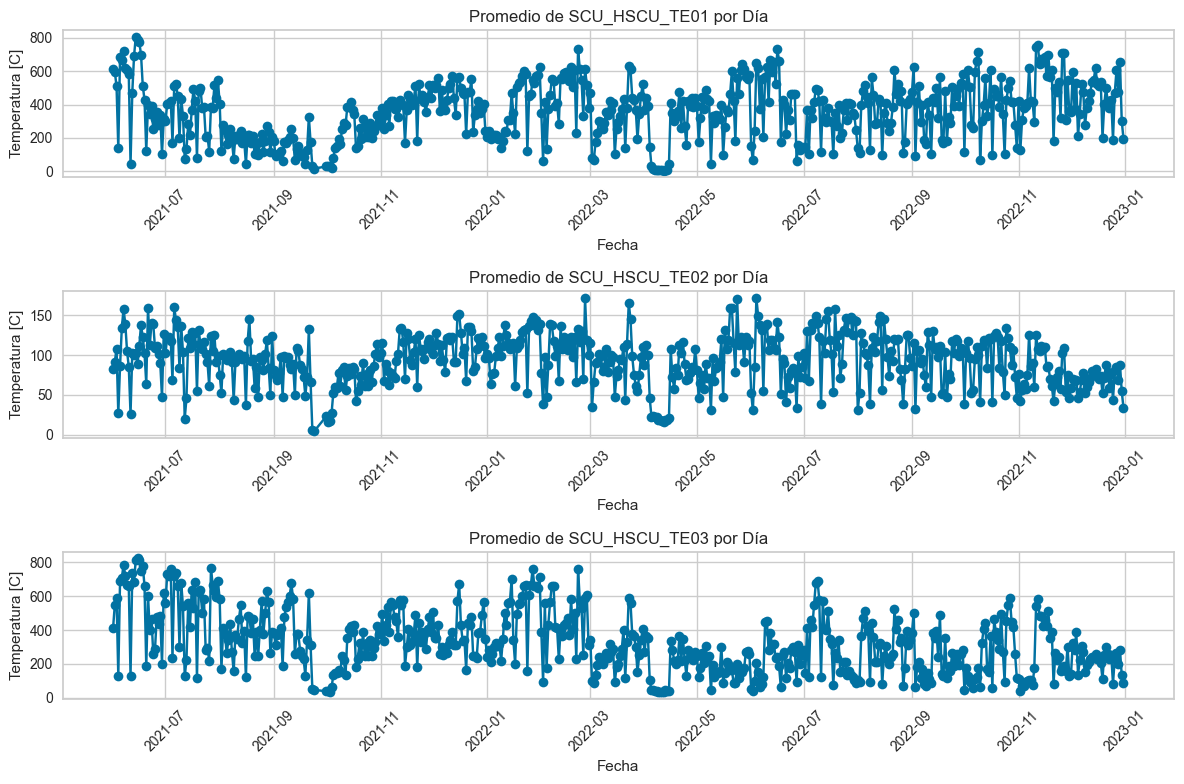

In [263]:
# Supongamos que tienes un DataFrame df con las columnas mencionadas
df_temperaturas['Data'] = pd.to_datetime(df_temperaturas['Data'], format='%d/%m/%Y')
# Convertir la columna 'Data' a datetime si aún no lo está
#df_temperaturas['Data'] = pd.to_datetime(df_temperaturas['Data'], format='%Y-%m-%d')
# Calcular el promedio diario para cada columna de temperatura
df_promedio_temperatura1 = df_temperaturas.groupby(df_temperaturas['Data'].dt.date)['SCU_HSCU_TE01'].mean().reset_index()
df_promedio_temperatura2 = df_temperaturas.groupby(df_temperaturas['Data'].dt.date)['SCU_HSCU_TE02'].mean().reset_index()
df_promedio_temperatura3 = df_temperaturas.groupby(df_temperaturas['Data'].dt.date)['SCU_HSCU_TE03'].mean().reset_index()
# Crear una figura para los gráficos
plt.figure(figsize=(12, 8))  # Tamaño opcional de la figura
# Crear el primer gráfico para el promedio de Temperatura1
plt.subplot(311)  # 3 filas, 1 columna, primer gráfico
plt.plot(df_promedio_temperatura1['Data'], df_promedio_temperatura1['SCU_HSCU_TE01'], marker='o', linestyle='-')
plt.title('Promedio de SCU_HSCU_TE01 por Día')
plt.xlabel('Fecha')
plt.ylabel('Temperatura [C]')
plt.grid(True)
plt.xticks(rotation=45)
# Crear el segundo gráfico para el promedio de Temperatura2
plt.subplot(312)  # 3 filas, 1 columna, segundo gráfico
plt.plot(df_promedio_temperatura2['Data'], df_promedio_temperatura2['SCU_HSCU_TE02'], marker='o', linestyle='-')
plt.title('Promedio de SCU_HSCU_TE02 por Día')
plt.xlabel('Fecha')
plt.ylabel('Temperatura [C]')
plt.grid(True)
plt.xticks(rotation=45)
# Crear el tercer gráfico para el promedio de Temperatura3
plt.subplot(313)  # 3 filas, 1 columna, tercer gráfico
plt.plot(df_promedio_temperatura3['Data'], df_promedio_temperatura3['SCU_HSCU_TE03'], marker='o', linestyle='-')
plt.title('Promedio de SCU_HSCU_TE03 por Día')
plt.xlabel('Fecha')
plt.ylabel('Temperatura [C]')
plt.grid(True)
plt.xticks(rotation=45)
# Ajustar el diseño de los gráficos
plt.tight_layout()

In [264]:
df_final = pd.merge(df_promedio_temperatura1, df_promedio_temperatura2, on='Data', how='inner')
df_final = pd.merge(df_final, df_promedio_temperatura3, on='Data', how='inner')
# Renombrar las columnas para reflejar la temperatura asociada
df_final.rename(columns={
    'SCU_HSCU_TE01': 'Promedio_TE01',
    'SCU_HSCU_TE02': 'Promedio_TE02',
    'SCU_HSCU_TE03': 'Promedio_TE03'
}, inplace=True)
# Mostrar el DataFrame resultante
print(df_final)


           Data  Promedio_TE01  Promedio_TE02  Promedio_TE03
0    2021-06-01     614.262500      82.595833     410.045833
1    2021-06-02     596.095833      91.220833     546.820833
2    2021-06-03     509.704167     108.295833     591.512500
3    2021-06-04     139.233333      26.641667     130.537500
4    2021-06-05     684.329167      86.254167     689.754167
..          ...            ...            ...            ...
568  2022-12-27     605.229167      84.445833     263.270833
569  2022-12-28     477.920833      68.533333     200.737500
570  2022-12-29     656.820833      88.066667     283.083333
571  2022-12-30     301.616667      54.454167     133.000000
572  2022-12-31     194.808696      33.686957      86.221739

[573 rows x 4 columns]


<div style="font-size: 45px; font-weight: bold;">4: Analisis conjunto de los datos (Produccion, combustible y temperaturas) </div>

df_produccion1=Consumo de combustible 
df_temperaturas=temperaturas
df_produccion=produccion 

# Base de datos conjunta; Obteniendo la informacion preliminar

In [265]:
print("------------------------")
print("Consumo de combustible")
print(resultados.dtypes)
print(resultados.shape)
print("------------------------")
print("Nivel de produccion")
print(resultados_1.dtypes)
print(resultados_1.shape)
print("------------------------")
print("Temperaturas")
print(df_final.dtypes)
print(df_final.shape)


------------------------
Consumo de combustible
time                 object
combustible_hora    float64
dtype: object
(549, 2)
------------------------
Nivel de produccion
time           object
produccion    float64
dtype: object
(579, 2)
------------------------
Temperaturas
Data              object
Promedio_TE01    float64
Promedio_TE02    float64
Promedio_TE03    float64
dtype: object
(573, 4)


# Juntando la base de datos 

In [266]:
# Convertir las columnas de fecha a tipo datetime
resultados['time'] = pd.to_datetime(resultados['time'])
resultados_1['time'] = pd.to_datetime(resultados_1['time'])
df_final['Data'] = pd.to_datetime(df_final['Data'])
# Fusionar los tres DataFrames en base a la columna de fecha 'time'
df_combinado_int = pd.merge(resultados, resultados_1, on='time', how='inner')
df_combinado_final = pd.merge(df_combinado_int, df_final, left_on='time', right_on='Data', how='inner')
# Mostrar el DataFrame resultante
print("------------------------")
print("DataFrame Combinado")
print(df_combinado_final.dtypes)
#print(df_combinado_final.shape)
#print(df_combinado_final)


------------------------
DataFrame Combinado
time                datetime64[ns]
combustible_hora           float64
produccion                 float64
Data                datetime64[ns]
Promedio_TE01              float64
Promedio_TE02              float64
Promedio_TE03              float64
dtype: object


In [267]:
y=df_combinado_final.combustible_hora
x_prueba=df_combinado_final.copy()
x_prueba=x_prueba.drop(columns=["time","Data"])
print(x_prueba.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   combustible_hora  543 non-null    float64
 1   produccion        543 non-null    float64
 2   Promedio_TE01     543 non-null    float64
 3   Promedio_TE02     543 non-null    float64
 4   Promedio_TE03     543 non-null    float64
dtypes: float64(5)
memory usage: 21.3 KB
None


# Analisis exploratorio de los datos: Correlacion

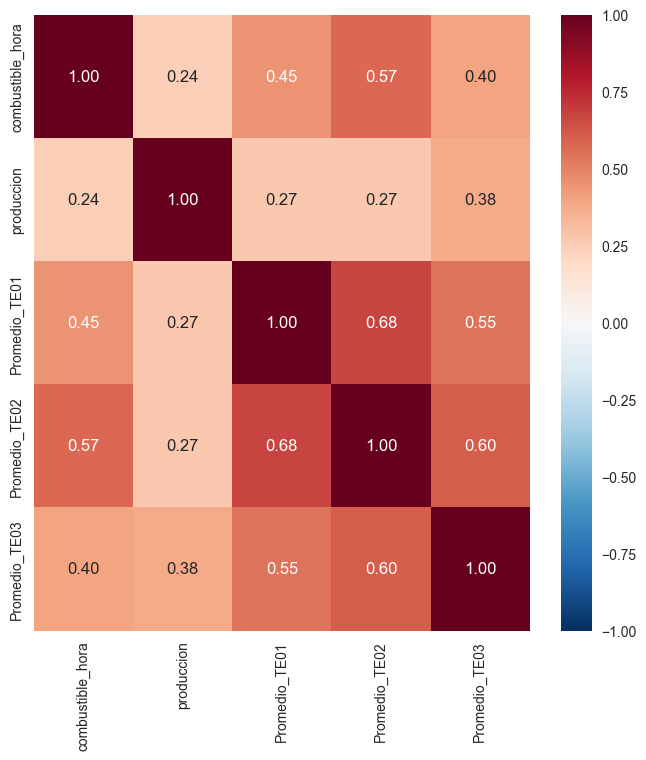

In [268]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(8, 8))
ax = heatmap(
    x_prueba.corr(),
    fmt=".2f",
    annot=True,
    ax=ax,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    )

# Analisis de distribucion de variables: Eliminacion de datos 

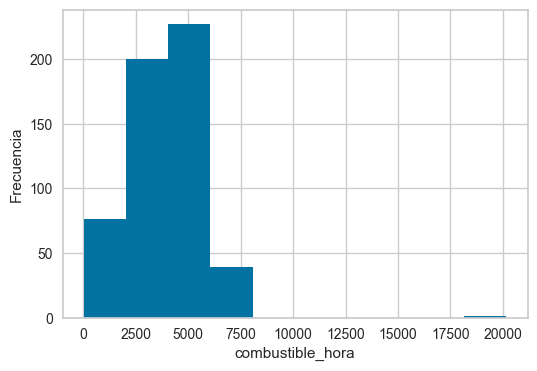

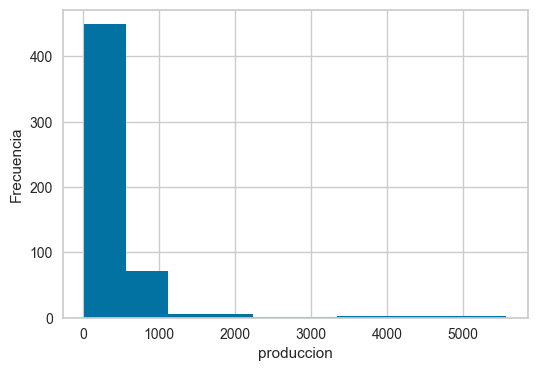

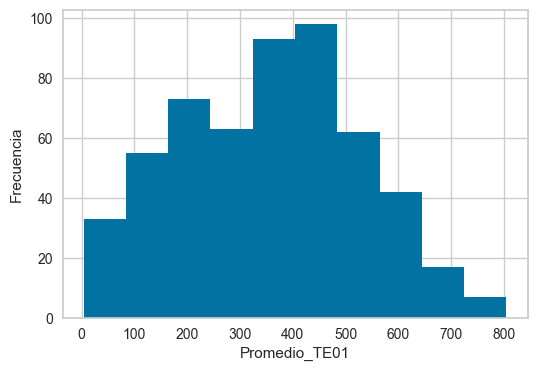

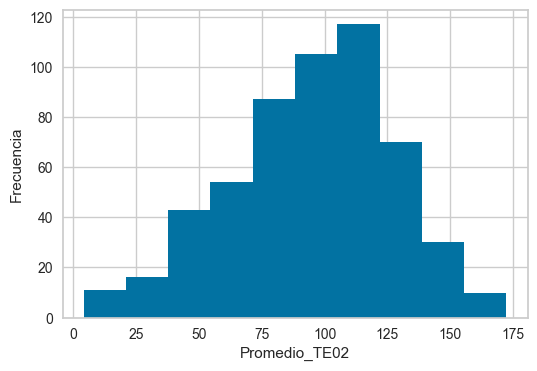

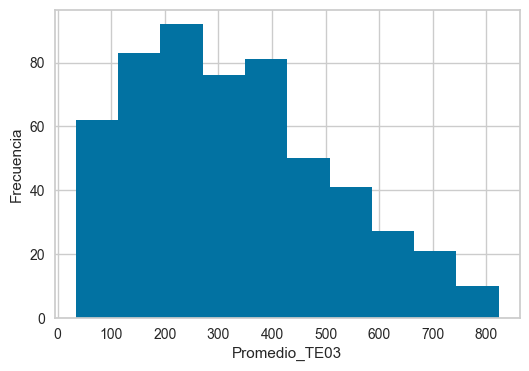

In [269]:
columnas=['combustible_hora','produccion', 'Promedio_TE01', 'Promedio_TE02', 'Promedio_TE03']

for columna in columnas:
    fig, ax = plt.subplots(figsize=(6, 4))
    x_prueba[columna].plot(kind="hist", ax=ax)
    # Agregar etiquetas a los ejes X e Y
    ax.set_xlabel(columna)
    ax.set_ylabel("Frecuencia")
    plt.show()

*Separacion del conjunto de datos*

In [270]:
y=df_combinado_final.combustible_hora
x_prueba=df_combinado_final.copy()
x_prueba=x_prueba.drop(columns=["time","Data"])
print(x_prueba.info())
X=df_combinado_final.drop(columns=["combustible_hora","time","Data"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   combustible_hora  543 non-null    float64
 1   produccion        543 non-null    float64
 2   Promedio_TE01     543 non-null    float64
 3   Promedio_TE02     543 non-null    float64
 4   Promedio_TE03     543 non-null    float64
dtypes: float64(5)
memory usage: 21.3 KB
None


In [271]:
# X son las características, y es la variable objetivo
# Se utiliza un 70% para entrenamiento y un 30% para prueba por lo general 
# El parámetro random_state garantiza reproducibilidad
porcentaje_conjunto_prueba=0.99
semilla_inicial=42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=porcentaje_conjunto_prueba,random_state=semilla_inicial)

In [272]:
# Imprimir conjunto de entrenamiento X
print("Conjunto de Entrenamiento (X):")
print(X_train.info())
print(X_test.info())

# Imprimir conjunto de entrenamiento y
print("\nConjunto de Entrenamiento (y):")
print(y_train.info())

# Imprimir conjunto de prueba X
print("\nConjunto de Prueba (X):")
print(X_test.info())

# Imprimir conjunto de prueba y
print("\nConjunto de Prueba (y):")
print(y_test.info())
columnas_nuevas_entrenamiento = list(X_train.columns)

print(columnas_nuevas_entrenamiento)

Conjunto de Entrenamiento (X):
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 71 to 102
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produccion     5 non-null      float64
 1   Promedio_TE01  5 non-null      float64
 2   Promedio_TE02  5 non-null      float64
 3   Promedio_TE03  5 non-null      float64
dtypes: float64(4)
memory usage: 200.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 530 to 20
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produccion     538 non-null    float64
 1   Promedio_TE01  538 non-null    float64
 2   Promedio_TE02  538 non-null    float64
 3   Promedio_TE03  538 non-null    float64
dtypes: float64(4)
memory usage: 21.0 KB
None

Conjunto de Entrenamiento (y):
<class 'pandas.core.series.Series'>
Index: 5 entries, 71 to 102
Series name: combustible_hora
Non-Null Count  Dtype

# Normalizacion de los datos

In [273]:
cols=["produccion", "Promedio_TE01", "Promedio_TE02", "Promedio_TE03"]
# Creación de un objeto StandardScaler
sca = preprocessing.StandardScaler()
# Estándarizar las características del conjunto de entrenamiento
X_train_std = sca.fit_transform(X_train[cols])
X_train_std = pd.DataFrame(X_train_std, columns=cols)
# Estándarizar las características del conjunto de prueba
X_test_std = sca.transform(X_test[cols])
X_test_std = pd.DataFrame(X_test_std, columns=cols)
# Imprimir información del conjunto de entrenamiento
print("-----------------------------------")
print("Conjunto de Entrenamiento:")
print("-----------------------------------")
print(X_train.columns)
#print(y_train.columns)
#print(X_train.info())
#print(X_train)
# Imprimir información del conjunto de prueba
print("-----------------------------------")
print("Conjunto de Prueba:")
print("-----------------------------------")
print(X_test.columns)
#print(X_test.info())
#print(X_test)

-----------------------------------
Conjunto de Entrenamiento:
-----------------------------------
Index(['produccion', 'Promedio_TE01', 'Promedio_TE02', 'Promedio_TE03'], dtype='object')
-----------------------------------
Conjunto de Prueba:
-----------------------------------
Index(['produccion', 'Promedio_TE01', 'Promedio_TE02', 'Promedio_TE03'], dtype='object')


# Deep learning

Epoch 1/2


2/2 [==============================] - 1s 5ms/step - loss: 22207480.0000
Epoch 2/2
17/17 [==============================] - 0s 2ms/step - loss: 6.4155
Loss en el conjunto de prueba: 6.415513038635254
17/17 [==============================] - 0s 4ms/step


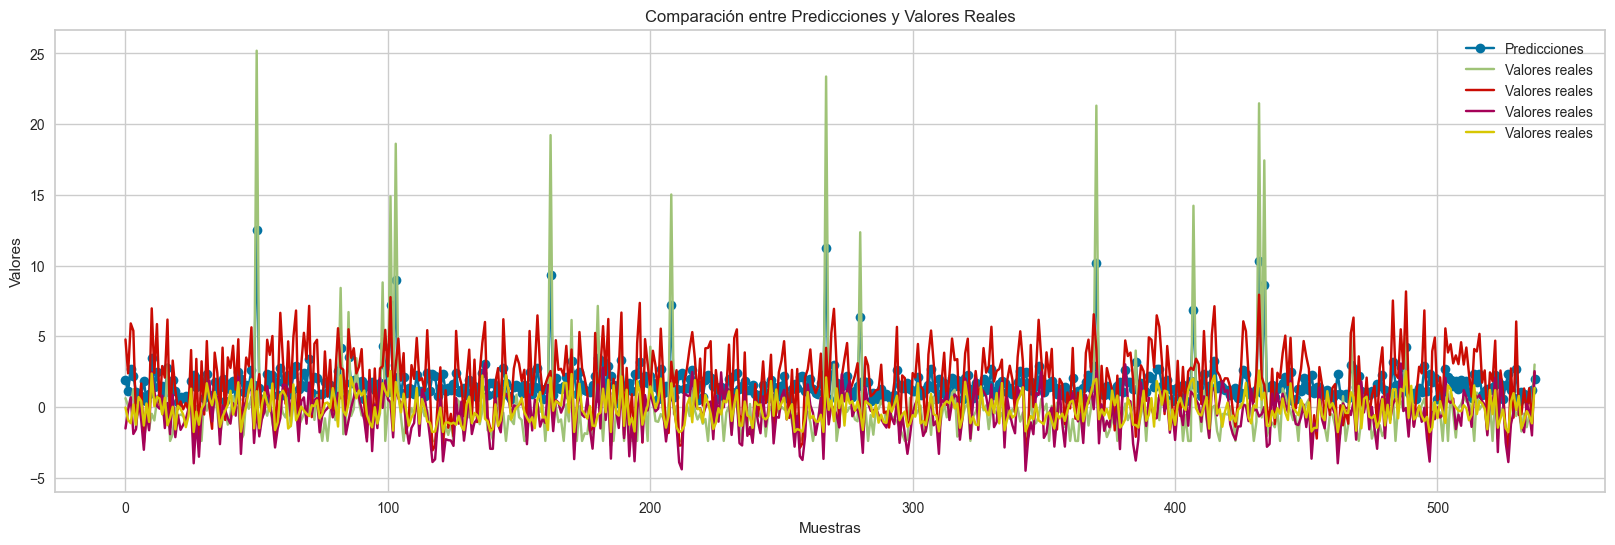

In [274]:
import tensorflow as tf


# Definir la activacion 
act = tf.keras.layers.ReLU()


nn_dp = tf.keras.models.Sequential([
  tf.keras.layers.Dense(500, activation=act, input_shape=(4,)),
  tf.keras.layers.Dense(250, activation=act),
  tf.keras.layers.Dense(1, activation='linear')])


# Loss function
mse = tf.keras.losses.MeanSquaredError()
def loss_dp(y_true, y_pred):
    return mse(y_true, y_pred)
optimizer_dp = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_dp.compile(optimizer=optimizer_dp, loss=loss_dp)
# Training
# Entrenamiento
results_dp = nn_dp.fit(X_train_std, y_train,epochs=2, batch_size=4, verbose=1)

# Suponiendo que tienes un conjunto de prueba llamado X_test_std y las etiquetas correspondientes y_test
# Evaluación en el conjunto de prueba
evaluation_results = nn_dp.evaluate(X_test_std, X_test_std, verbose=1)

# Imprimir los resultados de la evaluación
print("Loss en el conjunto de prueba:", evaluation_results)
predictions = nn_dp.predict(X_test_std)

# Graficar las predicciones y los valores reales
plt.figure(figsize=(20, 6))

# Graficar las predicciones
plt.plot(predictions, label='Predicciones', marker='o')

# Graficar los valores reales
plt.plot(X_test_std, label='Valores reales', marker='x')

plt.title('Comparación entre Predicciones y Valores Reales')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.legend()

# Separacion de los datos

In [275]:
#Hacer el entrecruzamiento diario entre las dos variables
#Hacer la suma de los combustibles 
resultados = df_produccion1.groupby(df_produccion1['time'].dt.date)['combustible_hora'].sum().reset_index()
print(resultados)

           time  combustible_hora
0    2021-06-01            3267.6
1    2021-06-02            4309.8
2    2021-06-03            4324.2
3    2021-06-04            1038.6
4    2021-06-05            4413.0
..          ...               ...
544  2022-11-27            4475.4
545  2022-11-28            3097.8
546  2022-11-29            3049.2
547  2022-11-30            1936.8
548  2022-12-01            1524.6

[549 rows x 2 columns]


# Normalizacion 

In [276]:
df_combinado = pd.merge(resultados_1, resultados, on="time", how="inner")
print(df_combinado)

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [ ]:
# Filtrar las filas donde "produccion" es menor o igual a mil
df_combinado = df_combinado[df_combinado["produccion"] <= 1000]
print(df_combinado)

           time  produccion  combustible_hora
2    2021-06-03      492.30            4324.2
3    2021-06-04      217.44            1038.6
4    2021-06-05      619.83            4413.0
5    2021-06-06      475.85            5194.8
6    2021-06-07      396.05            5562.6
..          ...         ...               ...
544  2022-11-27      662.11            4475.4
545  2022-11-28      216.32            3097.8
546  2022-11-29      530.48            3049.2
547  2022-11-30      490.09            1936.8
548  2022-12-01      325.02            1524.6

[524 rows x 3 columns]


In [ ]:
# Filtrar las filas donde "produccion" sea mayor o igual a 10
df_combinado = df_combinado[df_combinado["produccion"] >= 10]
print(df_combinado)

           time  produccion  combustible_hora
2    2021-06-03      492.30            4324.2
3    2021-06-04      217.44            1038.6
4    2021-06-05      619.83            4413.0
5    2021-06-06      475.85            5194.8
6    2021-06-07      396.05            5562.6
..          ...         ...               ...
544  2022-11-27      662.11            4475.4
545  2022-11-28      216.32            3097.8
546  2022-11-29      530.48            3049.2
547  2022-11-30      490.09            1936.8
548  2022-12-01      325.02            1524.6

[453 rows x 3 columns]


In [ ]:
# Filtrar las filas donde "combustible_hora" sea menor o igual a 7000
df_combinado = df_combinado[df_combinado["combustible_hora"] <= 7000]
print(df_combinado)

           time  produccion  combustible_hora
2    2021-06-03      492.30            4324.2
3    2021-06-04      217.44            1038.6
4    2021-06-05      619.83            4413.0
5    2021-06-06      475.85            5194.8
6    2021-06-07      396.05            5562.6
..          ...         ...               ...
544  2022-11-27      662.11            4475.4
545  2022-11-28      216.32            3097.8
546  2022-11-29      530.48            3049.2
547  2022-11-30      490.09            1936.8
548  2022-12-01      325.02            1524.6

[432 rows x 3 columns]


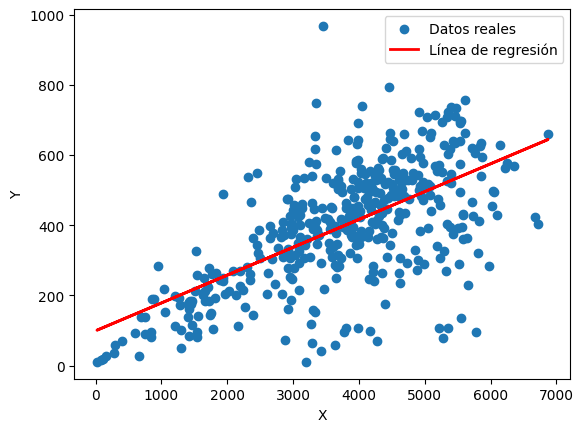

   Pendiente  Intercepto       R^2
0   0.079325   98.980411  0.400424


In [ ]:

# Dividir los datos en variables independientes (X) y dependientes (y)

X = df_combinado["combustible_hora"].values.reshape(-1, 1)
y = df_combinado["produccion"].values

# Crear un modelo de regresión lineal

model = LinearRegression()
model.fit(X, y)

# Realizar predicciones utilizando el modelo

y_pred = model.predict(X)

# Crear un gráfico de dispersión de los datos

plt.scatter(X, y, label='Datos reales')

# Agregar la línea de regresión al gráfico

plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')

# Etiquetas de ejes y leyenda

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Calcular el coeficiente de determinación (R^2)
r_squared = r2_score(y, y_pred)
# Obtener la pendiente y el intercepto del modelo
slope = model.coef_[0]
intercept = model.intercept_
# Crear un DataFrame para mostrar los valores
result_df = pd.DataFrame({'Pendiente': [slope],'Intercepto': [intercept],'R^2': [r_squared]})
# Imprimir la tabla
print(result_df)

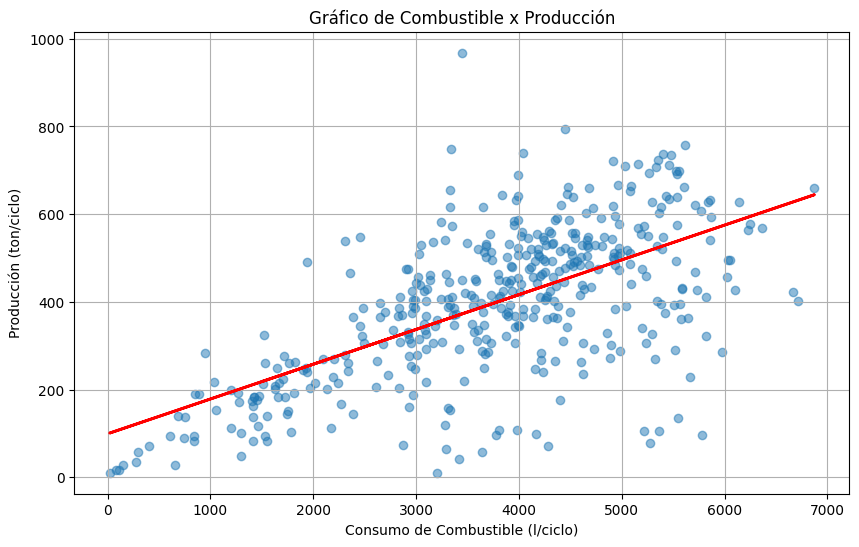

In [ ]:
import matplotlib.pyplot as plt

# Graficar "combustible_hora" en el eje X y "produccion" en el eje Y
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
plt.scatter(df_combinado['combustible_hora'], df_combinado['produccion'], alpha=0.5)
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title('Gráfico de Combustible x Producción')  
plt.xlabel('Consumo de Combustible (l/ciclo)')  
plt.ylabel('Producción (ton/ciclo)')  
plt.grid(True)  # Agregar una cuadrícula al gráfico (opcional)
# Mostrar el gráfico
plt.show()


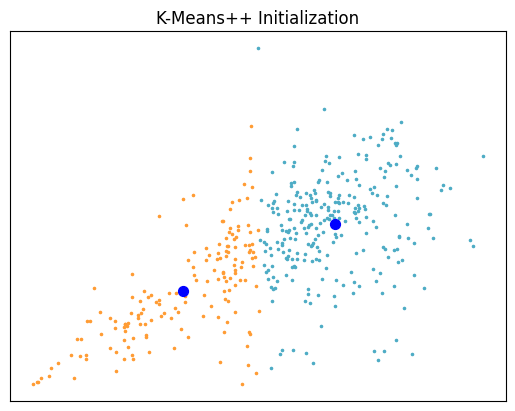

KMeans(n_clusters=2, n_init=10, random_state=0)



In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Generate sample data
n_samples = 4000
n_components = 2

# Asumiendo que ya tienes tus datos cargados en un DataFrame 'df_combinado'
X = df_combinado[['combustible_hora', 'produccion']]  # Asegúrate de seleccionar las columnas correctas
# No es necesario la línea siguiente, ya que no tienes que invertir las características
# X = X[:, ::-1]

# Initialize K-Means with K-Means++ initialization
kmeans = KMeans(n_clusters=n_components, init='k-means++', random_state=0, n_init=10)

kmeans.fit(X)

# Get cluster centers
centers_init = kmeans.cluster_centers_

# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = kmeans.labels_ == k
    plt.scatter(X.values[cluster_data, 0], X.values[cluster_data, 1], c=col, marker=".", s=10)
    plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')

plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()
print(kmeans)
print()

Cluster 1 - Centro: (1765.6036363636365, 210.65836363636367)
Cluster 2 - Centro: (4656.857142857143, 492.96791208791205)
Cluster 3 - Centro: (3924.2477064220184, 429.84385321100916)
Cluster 4 - Centro: (5614.512676056338, 495.51549295774646)
Cluster 5 - Centro: (592.6736842105265, 101.73526315789479)
Cluster 6 - Centro: (3048.986206896552, 358.06931034482756)


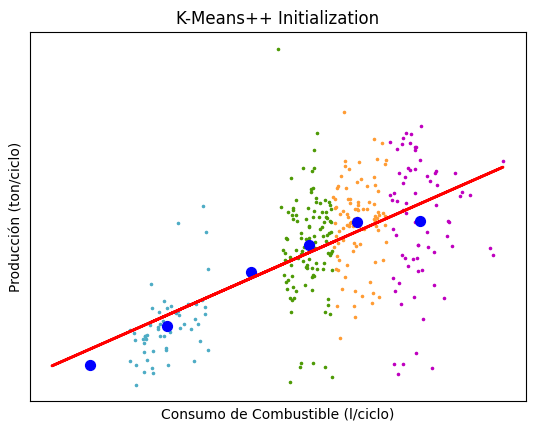

In [ ]:
# Generar datos de muestra
n_samples = 4000
n_components = 6

# Asumiendo que ya tienes tus datos cargados en un DataFrame 'df_combinado'
X = df_combinado[['combustible_hora', 'produccion']]

# Inicializar K-Means con inicialización K-Means++
kmeans = KMeans(n_clusters=n_components, init='k-means++', random_state=0, n_init=10)
kmeans.fit(X)

# Obtener los centros de los clusters
centers_init = kmeans.cluster_centers_

# Imprimir las coordenadas de los centros de los clusters
for i, center in enumerate(centers_init):
    print(f'Cluster {i+1} - Centro: ({center[0]}, {center[1]})')

# Plot init seeds junto a los datos de muestra
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = kmeans.labels_ == k
    plt.scatter(X.values[cluster_data, 0], X.values[cluster_data, 1], c=col, marker=".", s=10)
X_1 = df_combinado["combustible_hora"].values.reshape(-1, 1)
plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.plot(X_1, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title("K-Means++ Initialization")
plt.xlabel("Consumo de Combustible (l/ciclo)")  # Título del eje X
plt.ylabel("Producción (ton/ciclo)")  # Título del eje Y
plt.xticks([])
plt.yticks([])
plt.show()